In [4]:
from keras.datasets import cifar100
# loading the dataset 
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [8]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history=model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)
Epoch 1/50
391/391 [==============================] - 8s 20ms/step - loss: 1.5129 - accuracy: 0.4488 - val_loss: 1.0943 - val_accuracy: 0.6093
Epoch 2/50
391/391 [==============================] - 7s 19ms/step - loss: 1.0942 - accuracy: 0.6136 - val_loss: 0.9529 - val_accuracy: 0.6664
Epoch 3/50
391/391 [==============================] - 8s 19ms/step - loss: 0.9193 - accuracy: 0.6780 - val_loss: 0.8966 - val_accuracy: 0.6837
Epoch 4/50
391/391 [==============================] - 8s 19ms/step - loss: 0.7940 - accuracy: 0.7232 - val_loss: 0.8743 - val_accuracy: 0.6944
Epoch 5/50
391/391 [==============================] - 8s 20ms/step - loss: 0.6928 - accuracy: 0.7572 - val_loss: 0.8252 - val_accuracy: 0.7167
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 0.5920 - accuracy: 0.7914 - val_loss: 0.8587 - val_accuracy: 0.7112
Epoch 7/50
391/391 [==============================] - 8s

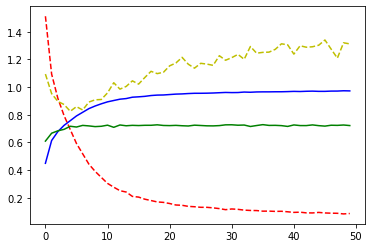

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'-b',label='accuracy')
plt.plot(history.history['loss'],'--r',label='loss')
plt.plot(history.history['val_accuracy'],'-g',label='val_accuracy')
plt.plot(history.history['val_loss'],'--y',label='val_loss')
#print(history.histort['accuracy'])